<a href="https://colab.research.google.com/github/ZeyadAboeleneen/Deep_Learning/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Model Accuracy: 96.49%


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b45a862bca7e92c397788f9a7825c574a7f3041681730a9763c3930cbdf66001
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification'
)

In [ ]:
i = 5
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
counterfactual_explanation = dice_exp.generate_counterfactuals(query_instance, total_CFs=1)
cf_df = counterfactual_explanation.cf_examples_list[0].final_cfs_df

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1875' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.02199' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dt

<BarContainer object of 30 artists>

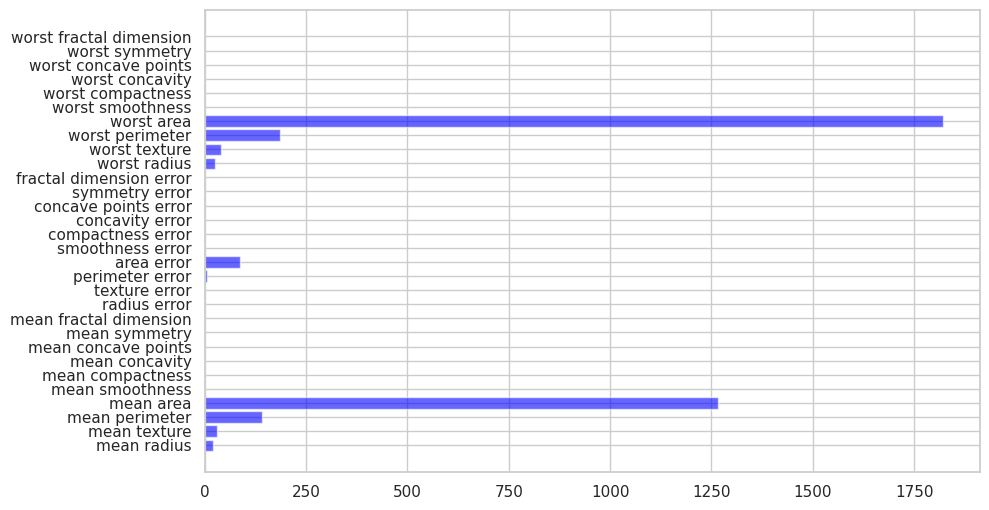

In [ ]:
plt.figure(figsize=(10, 6))
features = cf_df.columns[:-1]
plt.barh(features, query_instance.iloc[0].values.flatten(), color='blue', alpha=0.6, label='Original')

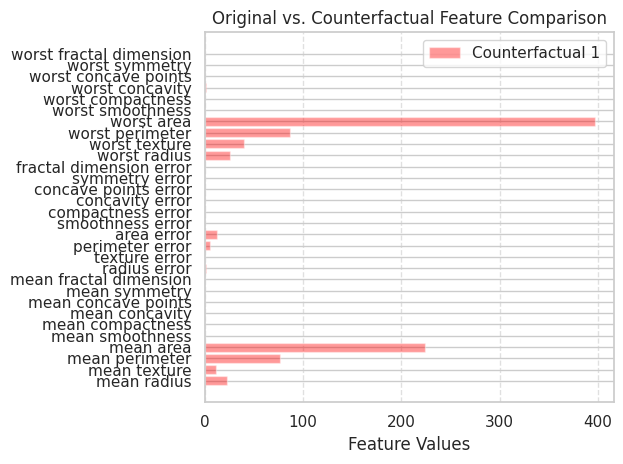

In [ ]:
for idx, cf in cf_df.iterrows():
    plt.barh(features, cf[features], color='red', alpha=0.4, label=f'Counterfactual {idx+1}')

plt.xlabel('Feature Values')
plt.title('Original vs. Counterfactual Feature Comparison')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('counterfactual_plot.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import shap

In [ ]:
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

In [ ]:
print(shap_values[1].shape)
print(X_test.shape)

(30, 2)
(114, 30)


In [ ]:
shap_values_class1 = shap_values[1]

<Figure size 640x480 with 0 Axes>

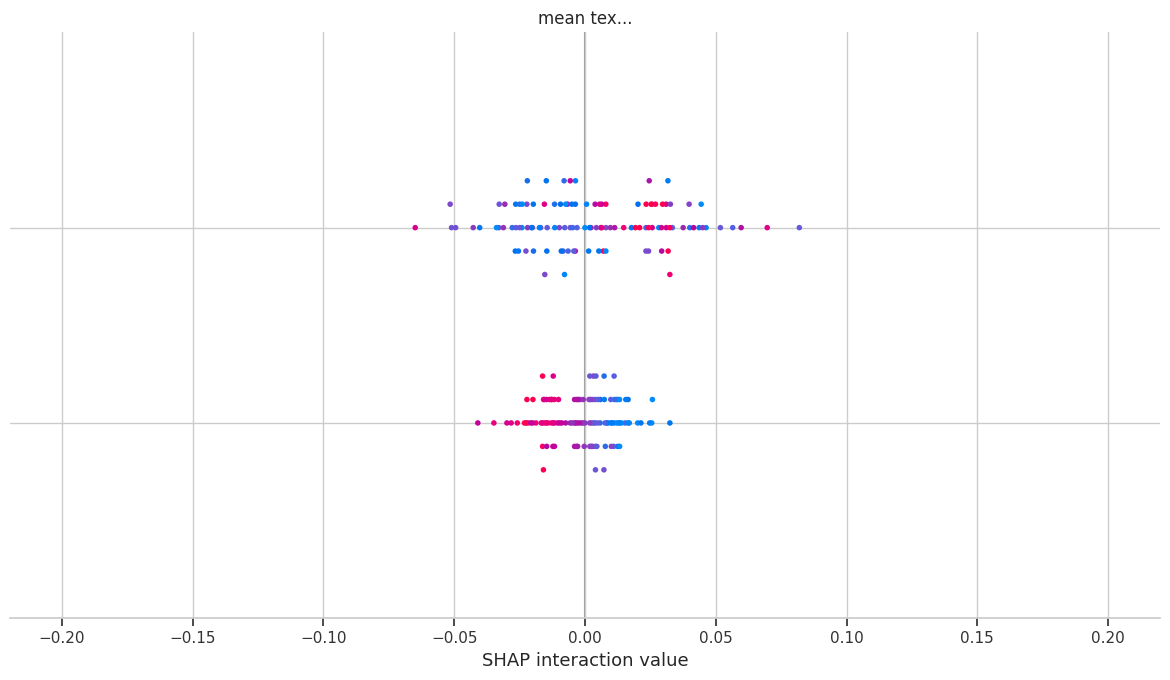

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1

In [ ]:
import dice_ml
from dice_ml.utils import helpers

In [ ]:
data_dice = dice_ml.Data(dataframe=data.frame,
                         continuous_features=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'],
                         outcome_name='target')

model_dice = dice_ml.Model(model=model, backend="sklearn")

In [ ]:
exp = dice_ml.Dice(data_dice, model_dice)

In [ ]:
query_instance = X_test.iloc[[i]]

In [ ]:
counterfactual_explanation = exp.generate_counterfactuals(query_instance, total_CFs=1)

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.02286' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01451' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  candidate_cfs.at[k, selected_features[k][0]] = random_instances.at[k, selected_features[k][0]]
/usr/local/lib/python3.11/dist-packages/dice_ml/explainer_interfaces/dice_random.py:116: FutureWarning: Setting an item of incompatible d

In [ ]:
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,20.6,29.33,140.100006,1265.0,0.1178,0.277,0.3514,0.152,0.2397,0.07016,...,39.42,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124,0



Diverse Counterfactual set (new outcome: 1)


/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.32,29.33,140.10,1265.0,0.0767,0.277,0.03653,0.002941,0.2275,0.07016,...,39.42,184.60,284.4,0.1089,0.8681,0.9387,0.10210,0.4087,0.124,1
1,20.60,10.83,120.55,1265.0,0.1178,0.277,0.35140,0.152000,0.1722,0.05743,...,25.58,62.25,335.9,0.1650,0.8681,0.1882,0.06005,0.2329,0.124,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
counterfactuals_df = counterfactual_explanation.cf_examples_list[0].final_cfs_df

In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dice-ml 0.11 requires pandas<2.0.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


<ipython-input-55-01f4c8334a9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counterfactuals_df.columns, y=counterfactuals_df.iloc[0], palette="viridis")


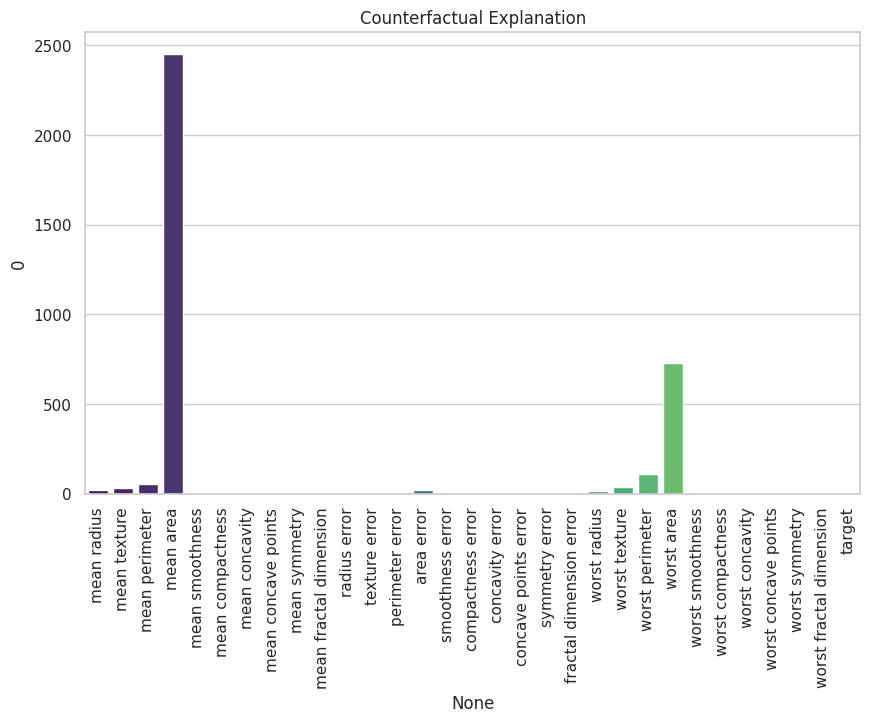

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=counterfactuals_df.columns, y=counterfactuals_df.iloc[0], palette="viridis")
plt.title('Counterfactual Explanation')
plt.xticks(rotation=90)
plt.show()